<a href="https://colab.research.google.com/github/gabrielvinicios02/ExperimentsMultivariate/blob/f-LSTM/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import os
import numpy as np
import pandas as pd
import torch
import torch.utils.data as tchdata
from sklearn import preprocessing
from sklearn import datasets, metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import svm
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox

## F1 : Plots

In [80]:
def plots(first, y_label, title, num_iterations , x_label='iterations',second=None, third=None, show_min=True):
    
    fig = plt.figure()
    fig.gca().set_position((.15, .3, .80, .6))
    
    plt.ylabel(y_label+"->")
    
#     (activation, layers_dims, num_iterations, learning_rate, lambd) = info
#     s1="lambda="+str(lambd)
#     s2="layers_dimensions="+str(layers_dims)
#     s3="num_iterations="+str(num_iterations)
#     s4="learning_rate="+str(learning_rate)
#     s5="activation="+str(activation)
    
    t =np.linspace(0, num_iterations-1, num=num_iterations)
    plt.figtext(.5,.92,title, fontsize=14, ha='center', fontweight='bold')        
#     plt.figtext(0.5,.136,s1+"\n"+s4+"\n"+s3+"\n"+s2,fontsize=10,ha='left', va='center',  bbox={'facecolor':'grey', 'alpha':0.3, 'pad':4})
    plt.figtext(0.25, .33, x_label+'->', fontsize=10,ha='left', va='center')  
#     plt.figtext(0.45,.85,s5,fontsize=10,ha='left', va='center',color='#B22222', bbox={'facecolor':'wheat', 'alpha':0.3, 'pad':5})     
    
    
    first_list, first_list_name=first
    first_array = np.array(first_list)
    (first_max_x, first_max_y)=(round((np.argmax(first_array)),3), round(np.amax(first_array), 3))

    #(global_max_x, global_max_y, global_max_name)=(t[first_max_x], first_max_y, first_list_name)
    if (second is not None):
        second_list, second_list_name=second
        second_array = np.array(second_list)
        (second_max_x, second_max_y)=(round((np.argmax(second_array)),3), round(np.amax(second_array), 3))
        #(global_max_x, global_max_y, global_max_name)=(global_max_x, global_max_y, global_max_name) if (global_max_y<second_max_y) else  (t[second_max_x], second_max_y,second_list_name)

    
    if not(third is None):
        third_list, third_list_name=third
        third_array=np.array(third_list)
        (third_max_x, third_max_y)=(round((np.argmax(third_array)),3), round(np.amax(third_array), 3))
        #(global_max_x, global_max_y, global_max_name)=(t[third_max_x], third_max_y, third_list_name) if (third_max_y<global_max_y) else  (global_max_x, global_max_y, global_max_name)
    

    if(show_min):
        plt.scatter(first_max_x,first_max_y,c='b',label='max_'+first_list_name+'('+str(first_max_x)+','+str(first_max_y)+')')
        if ((third is None) and (not(second is None))):
            plt.scatter(second_max_x,second_max_y,c='r',label='max_'+second_list_name+'('+str(second_max_x)+','+str(second_max_y)+')')

        elif (not(third is None) and not(second is None)):

            plt.scatter(second_max_x,second_max_y,c='r',label='max_'+second_list_name+'('+str(second_max_x)+','+str(second_max_y)+')')
            plt.scatter(third_max_x,third_max_y,c='g',label='max_'+third_list_name+'('+str(third_max_x)+','+str(third_max_y)+')')

        #print('For '+str(num_iterations)+' iterations, maximum value ['+str(global_max_y) + '] of the graph for "'+str(title)+'" was obtained at '+ str(global_max_x)+'th iteration, corresponding to "'+str(global_max_name)+'" plot.')

    plot1,=plt.plot(t, np.squeeze(first_list), 'b-', linewidth=1.5, label=first_list_name)
    plt.legend(bbox_to_anchor=(0.4, -0.15))
    if (not(second is None)):
            plot2,=plt.plot(t, np.squeeze(second_list), 'r-', linewidth=1.5, label=second_list_name)
            plt.legend(bbox_to_anchor=(0.4, 0))
            if(not(third is None)):
                plot3,=plt.plot(t, np.squeeze(third_list), 'g-', linewidth=1.5, label=third_list_name)
                plt.legend(bbox_to_anchor=(0.4, 0.15))
    
    
    plt.savefig('../content/drive/MyDrive/Colab Notebooks/DataTEP/plots/['+str(datetime.now()).replace(":", "")+'] '+title+".png")
    plt.show()
    return (0,0,0)

## F2/F3/F4 : Confusion Matrix 1/2/3

In [81]:
def confusion_table1(test_labels, pred, title):
    conf_matrix = metrics.confusion_matrix(test_labels, pred, labels=None)  # Get confustion matrix
    # Plot the confusion table
    x=[0, 1]
    class_names = ['${:d}$'.format(i) for i in x]  # Digit class names
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Show class labels on each axis
    ax.xaxis.tick_top()
    major_ticks = range(0,5)
    minor_ticks = [x + 0.5 for x in range(0, 5)]
    ax.xaxis.set_ticks(major_ticks, minor=False)
    ax.yaxis.set_ticks(major_ticks, minor=False)
    ax.xaxis.set_ticks(minor_ticks, minor=True)
    ax.yaxis.set_ticks(minor_ticks, minor=True)
    ax.xaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    ax.yaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    # Set plot labels
    ax.yaxis.set_label_position("right")
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    fig.suptitle(title, y=1.04, fontsize=14, ha='center', fontweight='bold')
    # Show a grid to seperate digits
    ax.grid(b=True, which=u'minor')
    # Color each grid cell according to the number classes predicted
    ax.imshow(conf_matrix, interpolation='nearest', cmap='binary')
    # Show the number of samples in each cell
    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            color = 'w' if x == y else 'k'
            ax.text(x, y, conf_matrix[y,x], ha="center", va="bottom", color=color)       
    plt.savefig('../content/drive/MyDrive/Colab Notebooks/DataTEP/plots/['+str(datetime.now()).replace(":", "")+'] Confusion table.png', bbox_inches='tight')
    plt.show()

## C1 : Accuracy Metric

In [82]:
class AccMectric(object):
    def __init__(self):
        self.reset()
        
    def reset(self):
        self._sum = 0
        self._count = 0
    
    def update(self, targets, outputs):
        pred = outputs.argmax(axis=1)
        self._sum += (pred == targets).sum()
        self._count += targets.shape[0]
        
    def get(self):
        return self._sum / self._count

## F5: Reading data from file

In [83]:
def read_data(error=0, is_train=True):
    fi = os.path.join('../content/drive/MyDrive/Colab Notebooks/DataTEP/',
        ('d0' if error < 10 else 'd') + str(error) + ('_te.dat' if is_train else '.dat'))
    with open(fi, 'r') as fr:
        data = fr.read()
    data = np.fromstring(data, dtype=np.float32, sep='   ')
    if fi == 'data/d00.dat':
        data = data.reshape(-1, 500).T
    else:
        data = data.reshape(-1, 52)
    if is_train:
        data = data[160: ]
    #dff = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosFalha.xlsx')
    #dfn = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosNormais.xlsx')
    #data = dfn
    return data, np.ones(data.shape[0], np.int64) * error

## F6: Reading and Converting data into sequence

In [84]:
def gen_seq_data(target, n_samples, is_train):
    seq_data, seq_labels = [], []
    for i, t in enumerate(target):
        d, _ = read_data(t, is_train)
        data = []
        length = d.shape[0] - n_samples + 1
        for j in range(n_samples):
            data.append(d[j : j + length])
        data = np.hstack(data)
        seq_data.append(data)
        seq_labels.append(np.ones(data.shape[0], np.int64) * i)
    return np.vstack(seq_data), np.concatenate(seq_labels)

## F7: Training a model using training data and an optimizer function

In [85]:
def train(model, optimizer, train_loader):
    model.train()
    acc = AccMectric()
    for data, labels in train_loader:
        x = torch.autograd.Variable(data.cuda())
        y = torch.autograd.Variable(labels.cuda())
        o = model(x)
        
        loss = torch.nn.NLLLoss()(torch.nn.LogSoftmax()(o), y)
        acc.update(labels.numpy(), o.data.cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return acc.get()

## F8: Testing a model using test data

In [86]:
def validate(model, test_loader):
    model.eval()
    acc = AccMectric()
    pred = []
    targets = []
    for data, labels in test_loader:
        x = torch.autograd.Variable(data.cuda())
        o = model(x)
        outputs = o.data.cpu().numpy()
        acc.update(labels.numpy(), outputs)
        pred.extend(outputs.argmax(axis=1))
        targets.extend(labels.numpy())
    return (acc.get(), np.asarray(pred), np.asarray(targets))

In [87]:
class LSTM(torch.nn.Module):
    def __init__(self, i, h, o, n_samples, is_bn=False):
        super(LSTM, self).__init__()
        self._lstm_cell = torch.nn.LSTMCell(i, h)
        self._fc = torch.nn.Linear(h, o)
        self._hidden = h
        self._n_samples = n_samples
        self._is_bn = is_bn
        if self._is_bn:
            self._bn = torch.nn.BatchNorm1d(h)
        
    def forward(self, x):
        seq_data = x.chunk(self._n_samples, dim=1)
        h_t = torch.autograd.Variable(torch.zeros(x.size(0), self._hidden).cuda())
        c_t = torch.autograd.Variable(torch.zeros(x.size(0), self._hidden).cuda())
        for data in seq_data:
            h_t, c_t = self._lstm_cell(data, (h_t, c_t))
        if self._is_bn:
            h_t = self._bn(h_t)
        fc = self._fc(h_t)
        return fc

## F12 : Long/Short Term Memory 

---



In [92]:
def LSTM_TE(n_samples, n_hidden, target, train_data, train_labels, test_data, test_labels):
    train_dataset = tchdata.TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
    test_dataset = tchdata.TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

    train_loader = tchdata.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = tchdata.DataLoader(test_dataset, batch_size=32, shuffle=False)
    model = LSTM(52, n_hidden, len(target), n_samples, False)
    model.cuda()
    torch.backends.cudnn.benchmark = True
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.005)

    train_acc_LSTM=[]
    test_acc_LSTM=[]
    pred = []
    targets = []

    for i in range(60):
        train_acc = train(model, optimizer, train_loader)
        test_acc, pred, targets = validate(model, test_loader)
        train_acc_LSTM.append(train_acc)
        test_acc_LSTM.append(test_acc)
        print('{}\tepoch = {}\ttrain accuracy: {:0.3f}\ttest accuracy: {:0.3f}' \
            .format(datetime.now(), i, train_acc, test_acc))
     
    return (train_acc_LSTM, test_acc_LSTM, targets, pred)

# Fault Set


In [93]:
n_samples = 3      
n_hidden = 30
n_components=30
target1 = [1, 2]

In [94]:
train_data1, train_labels1 = gen_seq_data(target1, n_samples, is_train=True)
test_data1, test_labels1 = gen_seq_data(target1, n_samples, is_train=False)

scaler1 = preprocessing.StandardScaler().fit(train_data1)
train_data1 = scaler1.transform(train_data1)
test_data1 = scaler1.transform(test_data1)

In [95]:
lstm1 = LSTM_TE(n_samples, n_hidden, target1, train_data1, train_labels1, test_data1, test_labels1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2022-04-24 21:55:14.427594	epoch = 0	train accuracy: 0.982	test accuracy: 0.994
2022-04-24 21:55:14.654867	epoch = 1	train accuracy: 0.999	test accuracy: 0.996
2022-04-24 21:55:14.850087	epoch = 2	train accuracy: 0.999	test accuracy: 0.993
2022-04-24 21:55:15.051592	epoch = 3	train accuracy: 0.999	test accuracy: 0.992
2022-04-24 21:55:15.249745	epoch = 4	train accuracy: 0.999	test accuracy: 0.995
2022-04-24 21:55:15.447367	epoch = 5	train accuracy: 0.999	test accuracy: 0.995
2022-04-24 21:55:15.643544	epoch = 6	train accuracy: 0.999	test accuracy: 0.996
2022-04-24 21:55:15.834581	epoch = 7	train accuracy: 0.999	test accuracy: 0.986
2022-04-24 21:55:16.025131	epoch = 8	train accuracy: 0.997	test accuracy: 0.987
2022-04-24 21:55:16.220622	epoch = 9	train accuracy: 0.999	test accuracy: 0.996
2022-04-24 21:55:16.409193	epoch = 10	train accuracy: 0.999	test accuracy: 0.993
2022-04-24 21:55:16.610322	epoch = 11	train accuracy: 0.999	test accuracy: 0.991
2022-04-24 21:55:16.810219	epoch = 12	

Média de treino:  0.9984962406015038
Média de teste:  0.9942119944211993
Desvio padrão de treino:  0.0023027203763304584
Desvio padrão de teste:  0.003288284728829109


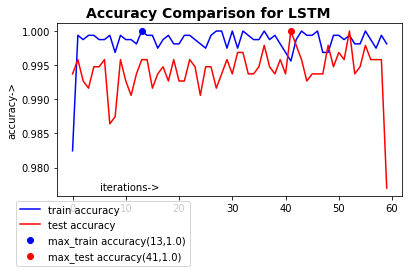

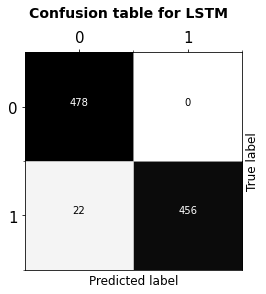

In [96]:
train_acc1, test_acc1, targets1, pred1 = lstm1
print("Média de treino: ",np.mean(train_acc1))
print("Média de teste: ",np.mean(test_acc1))
print("Desvio padrão de treino: ",np.std(train_acc1))
print("Desvio padrão de teste: ",np.std(test_acc1))
plots((train_acc1, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM',  num_iterations=60, x_label='iterations',second=(test_acc1, 'test accuracy'), third=None, show_min=True)
confusion_table1(targets1, pred1, 'Confusion table for LSTM')